<a href="" target="_blank">
  <button style="background-color:#0072ce; color:white; padding:0.6em 1.2em; font-size:1rem; border:none; border-radius:6px; margin-top:1em;">
    🚀 Launch this notebook in JupyterLab
  </button>
</a>

### Introduction

In this section, we will ... 

--> *Describe in 2-3 sentences what the notebook / workflow is about. If your notebook is a case study, give enough background of spatial extent / time period and applied methodology.*

### What we will learn

- 🚀 Learning objective 1
- 🔎 Learning objective 2
- 🛰️ Learning objective 3

--> *Include a related icon / emoji to make it engaging*

### Prerequisites

Describe the most relevant packages used in the tutorial.
Include [linked]() references or call-out notes.

<hr>

#### Import libraries

In [5]:
import xarray as xr # The basic package to deal with data arrays
import xarray_sentinel # Handles most basic SAR operations
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

/Users/devseed/Documents/repos/eopf-101/.venv/lib/python3.13/site-packages/xarray_sentinel/esa_safe.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


#### Helper functions

##### `function_name`

In [59]:
# For better visualization plottings
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 12

<hr>

In [79]:
url = "https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_b716/S1A_IW_GRDH_1SDV_20170508T164830_20170508T164855_016493_01B54C_8604.zarr"
dt = xr.open_datatree(url, engine='zarr', chunks={})

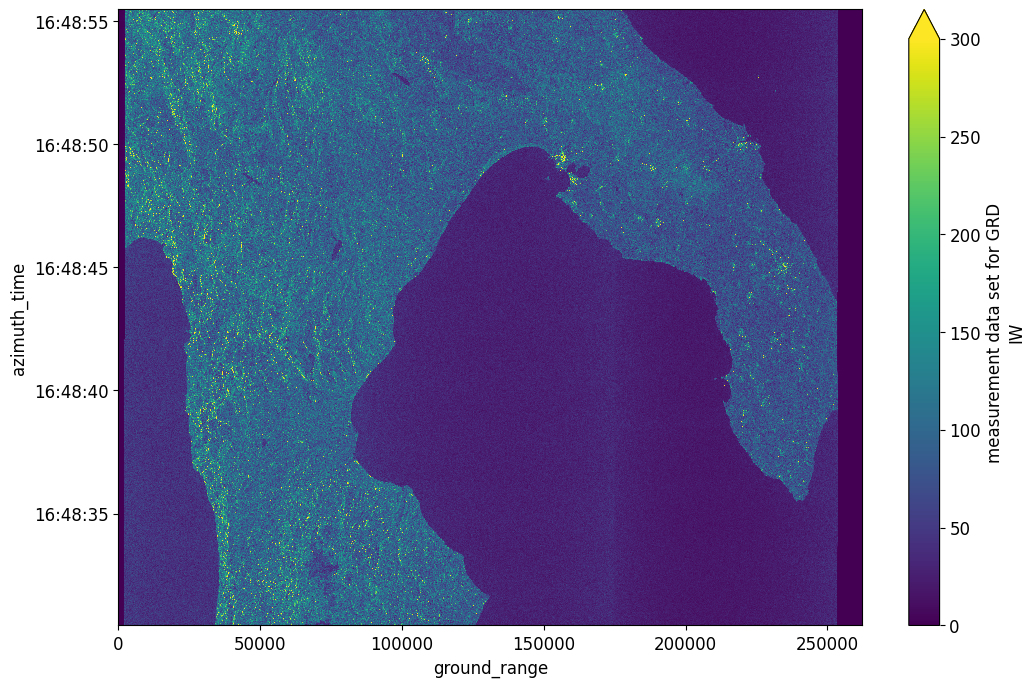

In [80]:
measurements = dt["S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/measurements"].to_dataset()
grd = measurements.grd.isel(
    azimuth_time=slice(None, None, 10), ground_range=slice(None, None, 10)
)
grd.plot(vmax=300)
plt.show()

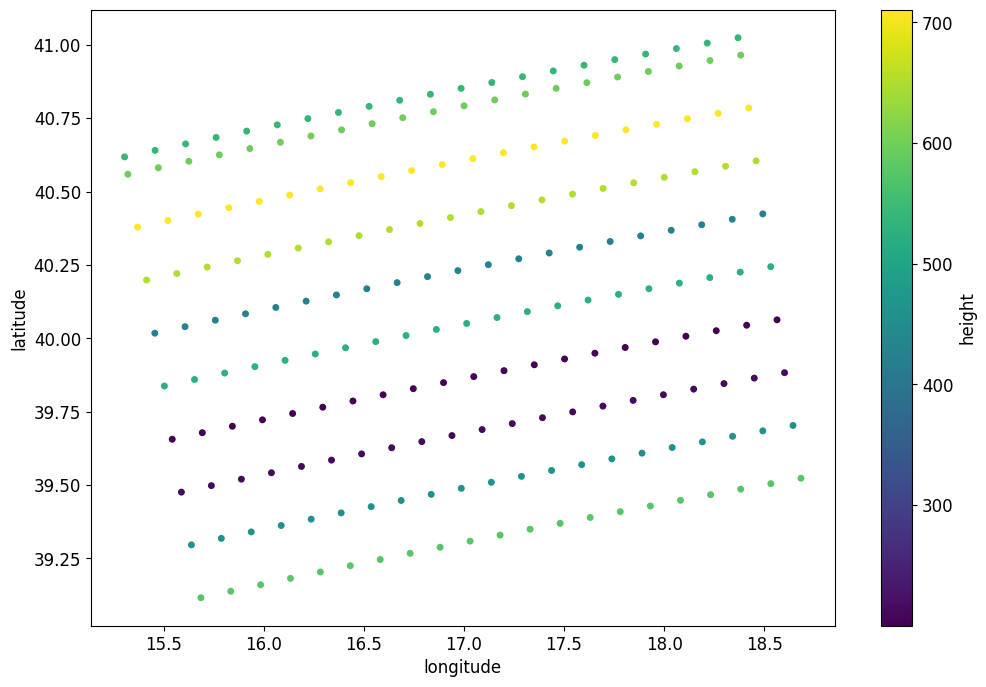

In [64]:
ground_control_point = dt["S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/gcp"].to_dataset()
ground_control_point.plot.scatter(x="longitude", y="latitude", hue="height")
plt.show()
gcp = ground_control_point.interp_like(grd)

In [65]:
grd = grd.assign_coords({"latitude": gcp.latitude, "longitude": gcp.longitude})

In [66]:
calibration = dt["/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/quality/calibration"].to_dataset()

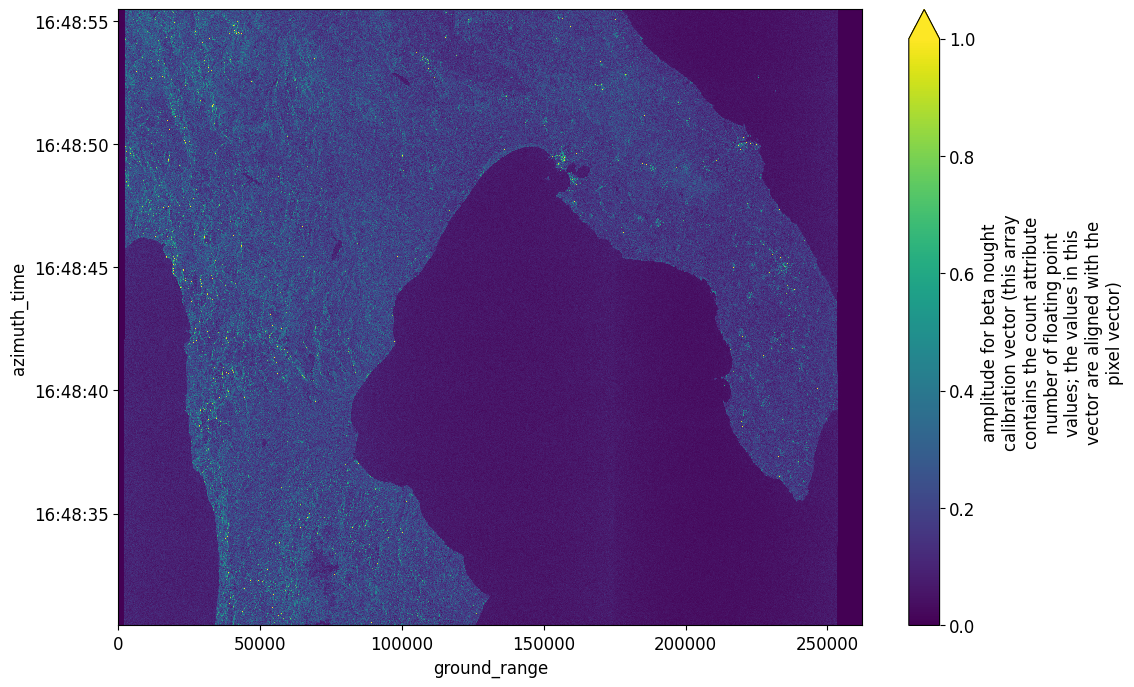

In [67]:
calibrate_amplitude = xarray_sentinel.calibrate_amplitude(
    grd, calibration.beta_nought
)
calibrate_amplitude.plot(vmax=1)
plt.show()

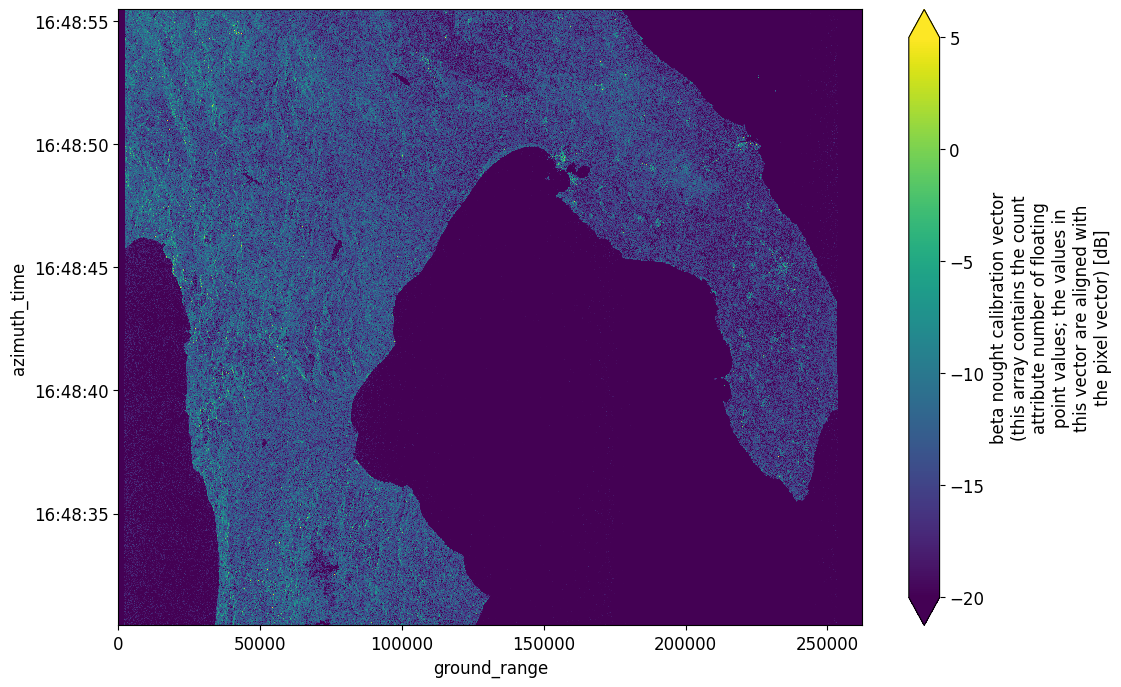

In [68]:
calibrate_intensity = xarray_sentinel.calibrate_intensity(
    grd, calibration.beta_nought, as_db=True
)
calibrate_intensity.plot(vmin=-20, vmax=5)
plt.show()

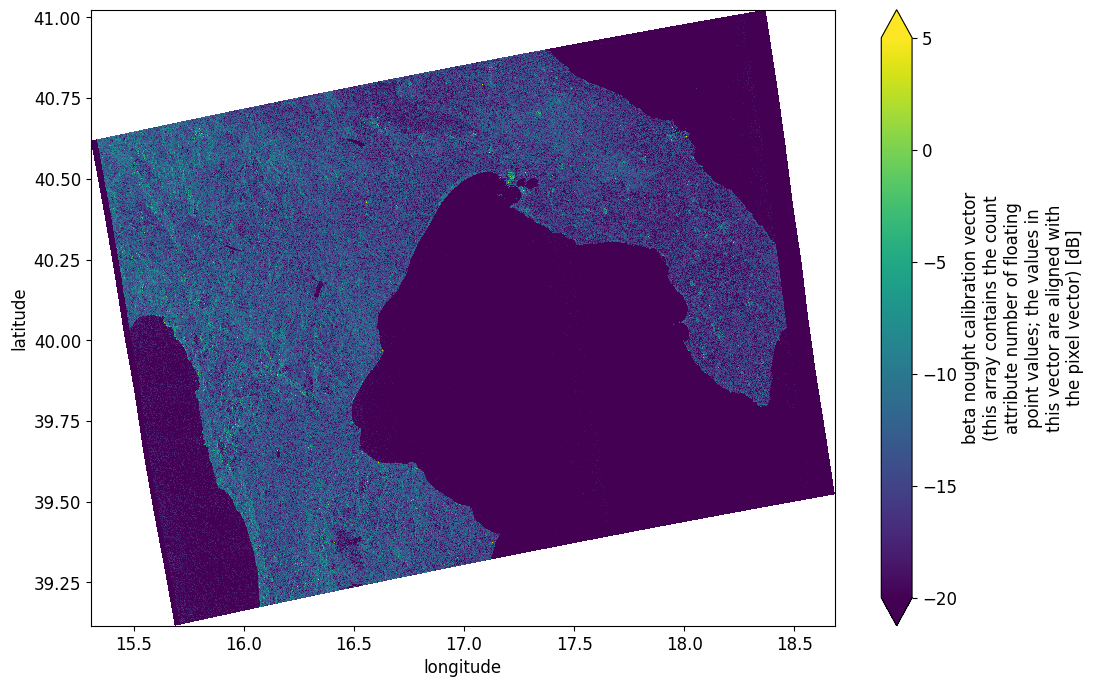

In [69]:
calibrate_intensity.plot(x="longitude", y="latitude", vmin=-20, vmax=5)
plt.show()

## Heading 1

Text with detailed explanations of each step of the workflow. 

In [2]:
# code starts here

### Subheading 1

### Subheading 2

## Heading 2

Text with detailed explanations of each step of the workflow. 

In [3]:
# code cell

--> *Textual description*

### Subheading 1

### Subheading 2

<hr>

## 💪 Now it is your turn

--> *This section contains an engaging part with some exercises or tasks for the learner.*

*Some ideas:*
* *Ask the learner to repeat the workflow with a different dataset*
* *Ask the learner to modify the area of interest.*
* *Ask the learner to reflect and test their level of understanding / comprehension*

Example: 

The following exercises will help you master the STAC API and understand how to find the data you need.

### Task 1: Explore Your Own Area of Interest
* Go to http://bboxfinder.com/ and select an area of interest (AOI) (e.g. your hometown, a research site, etc.)
* Copy the bounding box coordinates of your area of interest
* Change the provided code above to search for data over your AOI

### Task 2: Temporal Analysis
* Compare data availability across different years for the Sentinel-2 L-2A Collection.
* Search for items in year 2022
* Repeat the search for year 2024

### Task 3: Explore the SAR Mission and combine multiple criteria
* Do the same for a different Collection for example the Sentinel-1 Level-1 GRD, e.g. you can use the ID sentinel-1-l1-grd
* How many assets are available for the year 2024?


## Conclusion

--> *This section summarises the objectives of the notebook, what a learner learned and what possible conclusions / results were obtained.*

## What's next?

--> *In one or two sentences, describe what awaits the learner in the next chapter and include a link to the next chapter.*